### 🔮 FUNKY LUCKY DAY PREDICTION MODEL 🔮

Welcome, fellow adventurer, to the realm of the unknown! Prepare yourself to uncover the secrets of your fortunate days with our cutting-edge Lucky Day Prediction Model. Powered by AI and sprinkled with a dash of magic, this model is designed to decipher the cosmic patterns and unveil the days when luck will be on your side.

### IMPORTING LIBRARIES

In [58]:
# Importing required libraries.

import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectKBest,f_regression
import plotly.express as px
import warnings 
warnings.simplefilter("ignore")

### LOADING THE DATASET

In [59]:
# Loading the dataset obtained by mystical sources.

df = pd.read_csv("luckyDay.csv")
df.head()

,Birthdate,Zodiac Sign,Lucky Number,Lucky Charms,Rituals Followed,Lucky Day (%)
0,1998-05-04,Taurus,7,Yes,Yes,70
1,1996-08-17,Leo,4,No,No,25
2,1993-01-02,Capricorn,9,Yes,Yes,80
3,1987-12-28,Capricorn,3,Yes,Yes,85
4,1994-07-03,Cancer,5,No,Yes,20


In [60]:
# Converting the ['Birthdate'] dtype into int.

df['Birthdate'] = df['Birthdate'].str.replace('-', '').astype('int')

In [61]:
# Converting ['Zodiac Sign'] dtype into int.

zodiac_mapping = {zodiac: index for index, zodiac in enumerate(df['Zodiac Sign'].unique())}
df['Zodiac Sign'] = df['Zodiac Sign'].map(zodiac_mapping).astype(int)+1;
for zodiac, number in zodiac_mapping.items():
    print(zodiac,":",number+1)

Taurus : 1
Leo : 2
Capricorn : 3
Cancer : 4
Virgo : 5
Pisces : 6
Libra : 7
Scorpio : 8
Aries : 9
Aquarius : 10
Gemini : 11
Sagittarius : 12


In [62]:
# Converting ['Lucky Charms','Rituals Followed'] dtypes into int.

YN_mapping = {YN: index for index, YN in enumerate(df['Lucky Charms'].unique())}

df['Lucky Charms'] = df['Lucky Charms'].map(YN_mapping).astype(int)+1

df['Rituals Followed'] = df['Rituals Followed'].map(YN_mapping).astype(int)+1

# Yes :2 
# No : 1

### EDA

In [63]:
# Shape of the dataset.

df.shape

(323, 6)

In [64]:
# Info about the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Birthdate         323 non-null    int32
 1   Zodiac Sign       323 non-null    int32
 2   Lucky Number      323 non-null    int64
 3   Lucky Charms      323 non-null    int32
 4   Rituals Followed  323 non-null    int32
 5   Lucky Day (%)     323 non-null    int64
dtypes: int32(4), int64(2)
memory usage: 10.2 KB


From the above output we can infer that the given dataset DO NOT contain any NULL values.

In [65]:
# Central tendency and dispersion of the dataset.

df.describe()

,Birthdate,Zodiac Sign,Lucky Number,Lucky Charms,Rituals Followed,Lucky Day (%)
count,3.230000e+02,323.000000,323.000000,323.000000,323.000000,323.000000
mean,1.993031e+07,7.095975,4.882353,1.154799,1.359133,58.591331
std,3.560420e+04,3.209083,2.661859,0.362274,0.480491,24.554038
min,1.986032e+07,1.000000,1.000000,1.000000,1.000000,15.000000
25%,1.990101e+07,4.000000,3.000000,1.000000,1.000000,30.000000
50%,1.993012e+07,7.000000,5.000000,1.000000,1.000000,60.000000
75%,1.995598e+07,10.000000,7.000000,1.000000,2.000000,80.000000
max,1.999061e+07,12.000000,9.000000,2.000000,2.000000,90.000000


### DATA VISUALIZATION

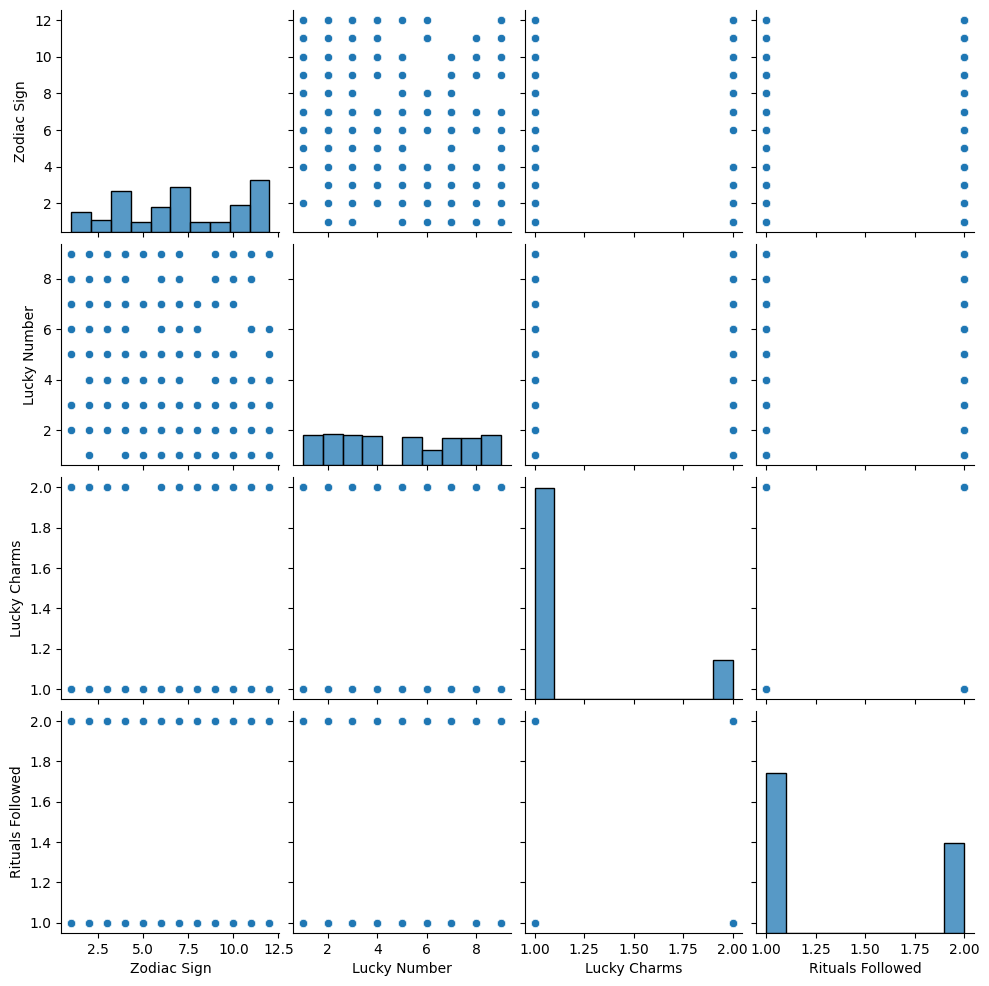

In [66]:
cols = ['Zodiac Sign', 'Lucky Number', 'Lucky Charms', 'Rituals Followed']
sn.pairplot(df[cols])

The above graph gives me relationships between every two columns in the dataset.

In [67]:
fig = px.scatter_3d(df, x='Lucky Number', y='Zodiac Sign', z='Lucky Day (%)', color='Lucky Charms')
fig.update_layout(title='Scatter Plot', autosize=False , width=800, height=600)
fig.update_traces(marker_size = 4)
fig.show()

The above 3d plot shows data distribution based on ['Zodiac Sign','Lucky Number','Lucky Day (%)','Lucky Charms'].

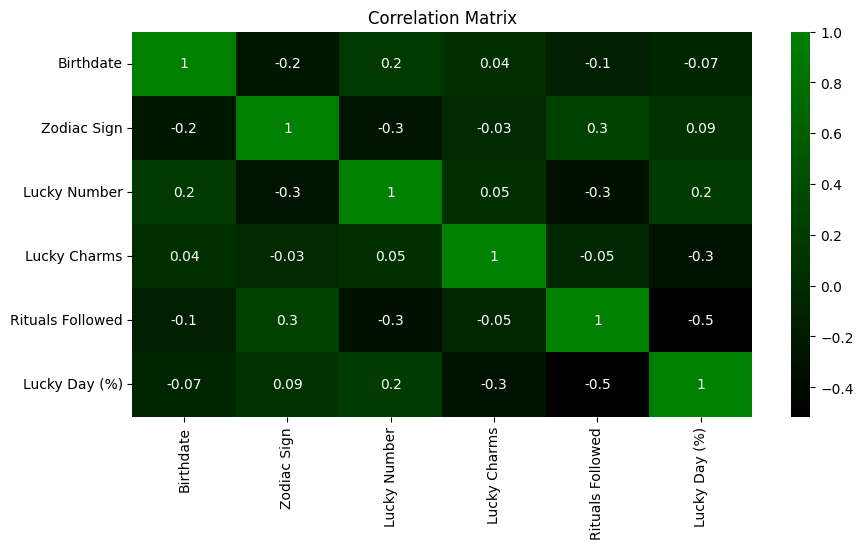

In [68]:
colors = LinearSegmentedColormap.from_list('blackg',["black", "g"], N=256) 
fig, ax = plt.subplots(figsize=(10,5))
sn.heatmap(df.corr(), annot=True, cmap = colors, fmt=".1g", cbar=True);
plt.title('Correlation Matrix')
plt.show()

The above co relation matrix shows us co linearity between each and every column of the dataset.

From the above graphs we can get following observations :
- Rituals followed and zodiac are two variables which have maximum co linearity.
- The frequency of people in dataset having lucky charm is more than that of people not having it.

### APPLYING THE MULTIPLE LINEAR REGRESSION MODEL

In [69]:
# Segrigating the required variables and target feature.

required_features=[]
target = "Lucky Day (%)"
for feature in df.columns :
    if feature != target :
         required_features.append(feature)
required_features

['Birthdate',
 'Zodiac Sign',
 'Lucky Number',
 'Lucky Charms',
 'Rituals Followed']

Selecting variables which are highly relevant for our model to reduce overfitting. SelectKBest by Sci-Kit learn is the algorithm for the purpose.

Also splitting the datset into test and train.

In [70]:
X=df[required_features]
y=df[target]
k=4
X_new = SelectKBest(f_regression, k=k).fit_transform(X, y)
selected_features = X.columns[SelectKBest(f_regression, k=k).fit(X, y).get_support()]
print(selected_features)
train_X, test_X, train_y, test_y = train_test_split(X_new, y,test_size=0.3,random_state=47)

Index(['Zodiac Sign', 'Lucky Number', 'Lucky Charms', 'Rituals Followed'], dtype='object')


From the above selection we get four best features :
- Zodiac Sign
- Lucky Number
- Lucky Charms
- Rituals Followed

Using LinearRegression on the training data.

In [71]:
reg = linear_model.LinearRegression()
reg.fit(train_X,train_y)

LinearRegression()

Slopes of optimum 4 dimensional curve.

In [72]:
reg.coef_

array([  1.92724406,   0.64827626, -20.59486577, -30.49577125])

Intercept of optimum 4 dimensional curve.

In [73]:
reg.intercept_

106.69244366169843

Predicting the %age of lucky days for testing data using the Multiple Linear Regression model.

In [74]:
predicted_y = reg.predict(test_X)
predicted_y

array([46.98916574, 71.66803539, 36.03880821, 71.03734384, 80.06045732,
       80.67356415, 71.03734384, 45.32660686, 47.25385092, 17.40635592,
       67.83113198, 71.03734384, 84.5632217 , 69.14526921, 59.46559154,
       71.03734384, 72.33389636, 67.18285572, 69.14526921, 54.06745044,
       80.06045732, 69.14526921, 50.82606915, 69.14526921, 71.6856201 ,
       74.92700139, 67.84871669, 72.33389636, 67.84871669, 28.32154403,
        9.67979496, 65.8863032 , 66.56974889, 29.58292712, 71.03734384,
       74.90941668, 72.33389636, 53.66627465, 49.81178652, 71.03734384,
       56.89007122, 71.03734384, 72.33389636, 42.75108654, 50.82606915,
       72.33389636, 25.728439  , 78.13321325, 47.60227257, 37.96605227,
       80.06045732, 50.82606915, 46.95399632, 32.86776577, 51.73903058,
       72.33389636, 72.33389636, 67.84871669, 80.06045732, 43.39936279,
       37.96605227, 69.11009978, 68.46182352, 50.82606915, 69.74079132,
       72.33389636, 37.96605227, 45.02675225, 80.06045732, 79.37

### CALCULATING ERROR

In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y,predicted_y))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y,predicted_y)))

Mean Absolute Error: 13.860843586794802
Root Mean Squared Error: 17.393245827524332


### CALCULATING R<sup>2</sup>

In [76]:
reg.score(test_X,test_y)

0.451729158287139

> _The amount of GOOD LUCK coming your way depends on your WILLINGNESS TO ACT._

### GOOD LUCK 😊

You can find the web-app made to lucky day prediction using the information obtained from the above analysis at https://lucky-day-prediction.vercel.app/

